<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Gerardo Ruiz Velasco Lazalde

**Fecha:** 15 de marzo del 2020.

**Expediente** :  y if715878 .
**Profesor:** Oscar David Jaramillo Zuluaga.

### Link de Github: https://github.com/GerardoRVL97/TAREA_7

# Tarea 7: Clase 13. Métodos de Reducción de Varianza

# Tarea 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
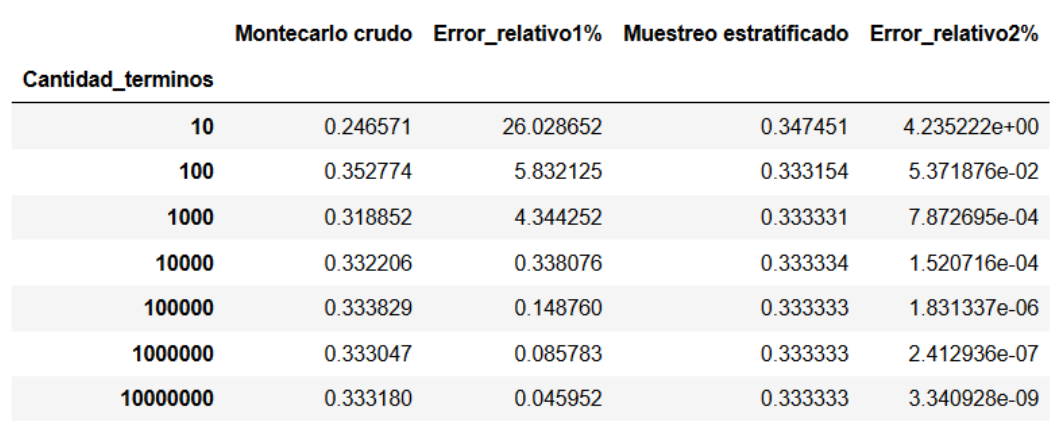

In [16]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

In [17]:
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [20]:
def met_estratificado(B:'Cantidad de estratos'):
    U2_est= np.random.rand(B)
    i_est = np.arange(0,B)
    v_est = (U2_est+i_est)/B
    return v_est

In [21]:

# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int) #ELIGE 7 NUMERO ENTRE 1 Y 7
B= N

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montecarlo Crudo', 'Error_relativo1%', 'Muestreo estratificado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))
ui_est = list(map(lambda B: met_estratificado(B),B))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

# Calculamos la aproximación por el metodo de muestreo estratificado
# dependiendo de la cantidad de términos que hayamos creado con ui_est
I_est = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui_est))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Montecarlo Crudo"] = I_m
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo Crudo"]-I)*100/I
df.loc[N,"Muestreo estratificado"] = I_est
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Muestreo estratificado"]-I)*100/I
df

,Montecarlo Crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.282267,15.319917,0.344281,3.284433e+00
100,0.338732,1.619488,0.333642,9.268611e-02
1000,0.331028,0.691721,0.333317,4.877144e-03
10000,0.335430,0.628850,0.333333,5.916806e-05
100000,0.333254,0.023908,0.333333,5.955042e-07
1000000,0.333738,0.121514,0.333333,1.390233e-07
10000000,0.333256,0.023202,0.333333,8.892387e-10
